# spaceNNtime in AADR dataset

In this notebook I analyse spaceNNtime results on AADR dataset

<a name="AADRHome4"></a>

## Contents

0. [ Library and packages ](#AADRLib)
1. [ Functions ](#AADRFun)
    + 1. [Python Functions](#AADRPyf)
    + 2. [R Functions](#AADRRfu)
2. [ spaceNNtime results in simulations ](#AADRExp)
    + 1. [Presentation of experiment simulated data](#AADRPrs)
    + 2. [Analise results](#AADRAna)
        - Correlation true vs predicted
        - Error
        - Plots
   
<a name="AADRLib"></a>
## 0. Library and packages

In [34]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [35]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 


In [36]:
%%R
.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"))

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(slendr)
library(rnaturalearth)
library(rnaturalearthdata)

options(dplyr.summarise.inform = FALSE)

In [37]:
#%%R
#
#gg_color_hue <- function(n) {
#  hues = seq(15, 375, length = n + 1)
#  hcl(h = hues, l = 65, c = 100)[1:n]
#}
#
#colors = gg_color_hue(6)
#col_pop = c("ALL" = "black",
#            "AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
#            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6])


In [38]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 



[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRFun"></a>
## 1. Functions

<a name="AADRPfu"></a>
### A. Python Functions

<a name="AADRRfu"></a>
### B. R Functions

In [39]:
%%R

rad <- function(x){
    (x * 180)/pi
}

haversine <- function(lat1, lon1, lat2, lon2){
    R = 6371  # radius of Earth in km
    
    phi_1 = lat1 * pi/180
    phi_2 = lat2 * pi/180
    del_phi = (lat2-lat1)* pi/180
    del_lam = (lon2-lon1)* pi/180
    
    a = (sin(del_phi/2)^2) + cos(phi_1) * cos(phi_2) * (sin(del_lam/2)^2)
    
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    round(R * c, 3)
}

In [40]:
%%R

data.frame(lat_true = c(41.507483, 51.510357),
           lon_true = c(-99.436554, -0.116773),
           lat_pred = c(38.504048, 38.889931),
           lon_pred = c(-98.315949, -77.009003)) %>%
    mutate(diff = haversine(lat_true, lon_true, lat_pred, lon_pred))

  lat_true   lon_true lat_pred  lon_pred     diff
1 41.50748 -99.436554 38.50405 -98.31595  347.328
2 51.51036  -0.116773 38.88993 -77.00900 5897.658



[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRExp"></a>
## 2. spaceNNtime results in the AADR dataset

<a name="AADRPrs"></a>
### A. Presentation of experiments ran

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [41]:
%%R

read.csv("../../files/experiments_AADR.csv", sep = ";")

   exp           nam met cro sta end  win
1    1          loss   1   1  10  20   10
2    2       general   1   1   0 100   10
3    2       general   1   2   0 100   10
4    3          loss   1   1  10  20   10
5    4     allwindow   1   1   0 100  100
6    4     allwindow   1   2   0 100  100
7    5    prediction   1   1  10  20   10
8    6    prediction   1   1  10  20   10
9    7         nodes   1   1  10  20   10
10   8         nodes   1   1  10  20   10
11   9        modern   9   1  10  20   10
12  10          tims  10   1   0 250   10
13  10          tims  10   2   0 100   10
14  11          tims  10   1   0 250  100
15  11          tims  10   2   0 100  100
16  12 tims_nomodern  12   1  10  20   10
17  13   tims_weight  10   1   0 100   10
18  14          tims  10   1   0 250 1000
                                                            dmt   pre typ  los
1               sntind_and_datmet_in_[\\"Direct\\",\\"Known\\"]  sNNt  gt hdtd
2               sntind_and_datmet_in_[\\"Dir


[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRAna"></a>
### E. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [42]:
%%R

read.table("../../sandbox/AADR/2/pred_1_10000000_20000000.txt", header = T) %>%
    head()

   sim exp     nam typ cro      sta      end gro                ind  idx  snp
1 AADR   2 general  gt   1 10000000 20000000   0             I13840   26 4463
2 AADR   2 general  gt   1 10000000 20000000   0             I15969  827 4463
3 AADR   2 general  gt   1 10000000 20000000   0      DA13_noUDG.SG 2131 4463
4 AADR   2 general  gt   1 10000000 20000000   1 s19_X20_1_noUDG.SG 1189 4463
5 AADR   2 general  gt   1 10000000 20000000   1     CR-01_noUDG.SG 4163 4463
6 AADR   2 general  gt   1 10000000 20000000   1          R11833.SG 4740 4463
       run true_lat   true_lon  pred_lat  pred_lon diff_space true_tim pred_tim
1 3.416814 40.67111   20.98472 50.390270  14.49986  1191.8320     6102 3785.895
2 3.416814 18.45100  -69.68600 13.421976 -65.30150   729.5843      995 1253.492
3 3.416814 49.06065   75.50320 47.649044  77.69067   225.2881     2568 3062.791
4 3.414237 59.43080   24.90890 50.660572  17.80256  1073.7507     2787 4494.631
5 3.414237 34.00361 -119.72639 -7.736803 -81.61590  61

In [43]:
%%bash

ls ../../files/AADR_*

../../files/AADR_filtered_metadata.csv
../../files/AADR_filtered_metadata.txt


In [44]:
%%R

read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
    select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind) %>%
    head()

                    ind master  datmet datmea                           locate
1 Ne30_genotyping_noUDG   NE30  Direct   9896                Nepal,__Kathmandu
2 Ne61_genotyping_noUDG   NE61  Direct   3421                Nepal,__Kathmandu
3 Ne35_genotyping_noUDG   NE35  Direct   8990                Nepal,__Kathmandu
4                I17622 I17622 Context   3050                Southwest,__Dukat
5                I13833 I13833 Context    325 Barç__(Southeast,__Korça__Basin)
6                 I3931  I3931  Direct   7858                         Aknashen
   countr      latitu      longit                                   warnin
1   China       45.96      126.23                                       ..
2   China       45.88      126.22                                       ..
3   China       45.91      125.95                                       ..
4 Albania      40.295 19.49027778 2500.to.5000.SNPs,__damage.ss.half=0.096
5 Albania   40.625278   20.801111                                       

In [45]:
%%R -w 1000 -h 1250

read.table("../../sandbox/AADR/2/pred_1_10000000_20000000.txt", header = T) %>%
#read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>%
    select(-c(diff_time, diff_space)) %>%
    gather("stat", "value", c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>% 
    separate(stat, c("truepred", "stat"), sep = "_") %>%
    left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>% 
    mutate(truepred = factor(truepred, levels = c("true", "pred"))) -> df
    
df %>%
    head()

   sim exp     nam typ cro      sta      end gro                ind  idx  snp
1 AADR   2 general  gt   1 10000000 20000000   0             I13840   26 4463
2 AADR   2 general  gt   1 10000000 20000000   0             I15969  827 4463
3 AADR   2 general  gt   1 10000000 20000000   0      DA13_noUDG.SG 2131 4463
4 AADR   2 general  gt   1 10000000 20000000   1 s19_X20_1_noUDG.SG 1189 4463
5 AADR   2 general  gt   1 10000000 20000000   1     CR-01_noUDG.SG 4163 4463
6 AADR   2 general  gt   1 10000000 20000000   1          R11833.SG 4740 4463
       run truepred stat    value master datmet datmea
1 3.416814     true  lat 40.67111 I13840 Direct   6102
2 3.416814     true  lat 18.45100 I15969 Direct    995
3 3.416814     true  lat 49.06065   DA13 Direct   2568
4 3.414237     true  lat 59.43080    X20 Direct   2787
5 3.414237     true  lat 34.00361  CR-01 Direct   1017
6 3.414237     true  lat 40.59380 R11833 Direct   1639
                                         locate              countr  

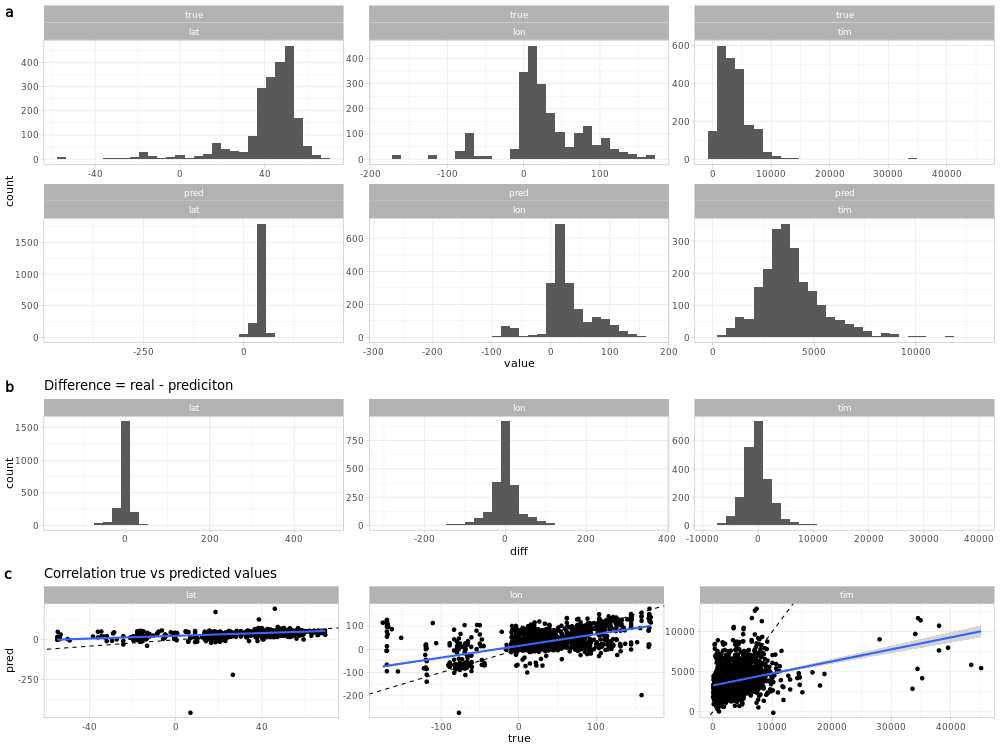

In [46]:
%%R -w 1000 -h 750

plot_grid(
    df %>%        
        ggplot() +
        #geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_histogram(aes(x = value), bins = 30) + 
        #geom_vline(data = . %>% group_by(pop, stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        #geom_vline(data = . %>% group_by(stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(truepred~stat, scales = "free") +
        theme_light(),
    df %>%
        spread(truepred, value) %>%
        mutate(diff = true - pred) %>%
        ggplot() +
        geom_histogram(aes(x = diff), bins = 30) + 
        #geom_histogram(aes(x = diff, fill = pop), bins = 30) + 
        #geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(diff)), aes(xintercept = mean, color = pop)) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = real - prediciton"),
    df %>%
        spread(truepred, value) %>%
        ggplot() +
        #geom_hline(data = . %>% group_by(stat) %>% summarize(mean = mean(true)), aes(yintercept = mean), linetype = "dashed") +
        #geom_point(aes(x = true, y = pred, color = pop)) +
        geom_point(aes(x = true, y = pred)) +
        geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
        geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true, y = pred)) +
        #geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
        #                                                             mean_true = mean(true),
        #                                                             se_pred   = 1.96*(sd(pred)/sqrt(n())),
        #                                                             se_true   = 1.96*(sd(true)/sqrt(n()))), 
        #              aes(x = mean_true, ymin = mean_pred-se_pred, ymax = mean_pred+se_pred)) +
        #geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
        #                                                             mean_true = mean(true),
        #                                                             se_pred   = 1.96*(sd(pred)/sqrt(n())),
        #                                                             se_true   = 1.96*(sd(true)/sqrt(n()))), 
        #              aes(y = mean_pred, xmin = mean_true-se_true, xmax = mean_true+se_true)) +
        #geom_point(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
        #                                                          mean_true = mean(true)), 
        #           aes(x = mean_true, y = mean_pred, fill = pop), shape = 22, size = 5) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto", rel_heights = c(2, 1, 1)
) -> plot

plot

#ggsave("true_pred.pdf", width = 20*2, height = 15*1.5, units = "cm")

plot

In [47]:
%%R

df %>% 
    group_by(stat) %>%
    spread(truepred, value) %>%
    summarize(mean_pred = mean(pred), mean_true = mean(true), mean_diff = mean(true-pred), sqrtdiff = mean(sqrt((true-pred)^2))) %>%
    as.data.frame() %>%
    print()

  stat  mean_pred  mean_true  mean_diff    sqrtdiff
1  lat   43.20763   40.88495  -2.322682    9.664024
2  lon   27.69199   26.12650  -1.565483   25.709938
3  tim 3869.68709 3835.39557 -34.291520 1904.485669


In [48]:
%%R

get_diff_data <- function(exp, pre, cro, sta, end, win = 0){
    if(win == 0){
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = "")
    }else{
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, "_", win, ".txt", sep = "")
    }
    
    if(pre == "space"){
        read.table(file, header = T) %>%
            #mutate(cro = cro, sta = sta, end = end) %>%
            mutate(extendedexp = paste(exp, cro, sta, end, sep = "_")) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon)) %>%
            rename(space = diff_space) %>%
            gather("stat", "value", c(space)) %>% 
            left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>%
            ######################################REMOVE MODERN INDIVIDUALS#######################################
            filter(datmet != "Modern")
    }else if(pre == "time"){
        read.table(file, header = T) %>%
            #mutate(cro = cro, sta = sta, end = end) %>%
            mutate(extendedexp = paste(exp, cro, sta, end, sep = "_")) %>%
            select(-c(true_tim,  pred_tim)) %>%
            rename(time = diff_time) %>%
            gather("stat", "value", c(time)) %>% 
            left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>%
            ######################################REMOVE MODERN INDIVIDUALS#######################################
            filter(datmet != "Modern")
    }else{
        read.table(file, header = T) %>%
            #mutate(cro = cro, sta = sta, end = end) %>%
            mutate(extendedexp = paste(exp, cro, sta, end, sep = "_")) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>%
            rename(time = diff_time, space = diff_space) %>%
            gather("stat", "value", c(time, space)) %>% 
            left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>%
            ######################################REMOVE MODERN INDIVIDUALS#######################################    
            filter(datmet != "Modern")
    }
}

    

get_diff_data(2, "sNNt", 1,  "10000000", "20000000") %>%
    head()

   sim exp     nam typ cro      sta      end gro                ind  idx  snp
1 AADR   2 general  gt   1 10000000 20000000   0             I13840   26 4463
2 AADR   2 general  gt   1 10000000 20000000   0             I15969  827 4463
3 AADR   2 general  gt   1 10000000 20000000   0      DA13_noUDG.SG 2131 4463
4 AADR   2 general  gt   1 10000000 20000000   1 s19_X20_1_noUDG.SG 1189 4463
5 AADR   2 general  gt   1 10000000 20000000   1     CR-01_noUDG.SG 4163 4463
6 AADR   2 general  gt   1 10000000 20000000   1          R11833.SG 4740 4463
       run           extendedexp stat      value master datmet datmea
1 3.416814 2_1_10000000_20000000 time  2316.1050 I13840 Direct   6102
2 3.416814 2_1_10000000_20000000 time  -258.4924 I15969 Direct    995
3 3.416814 2_1_10000000_20000000 time  -494.7915   DA13 Direct   2568
4 3.414237 2_1_10000000_20000000 time -1707.6309    X20 Direct   2787
5 3.414237 2_1_10000000_20000000 time  -464.4878  CR-01 Direct   1017
6 3.414237 2_1_10000000_20000000 t

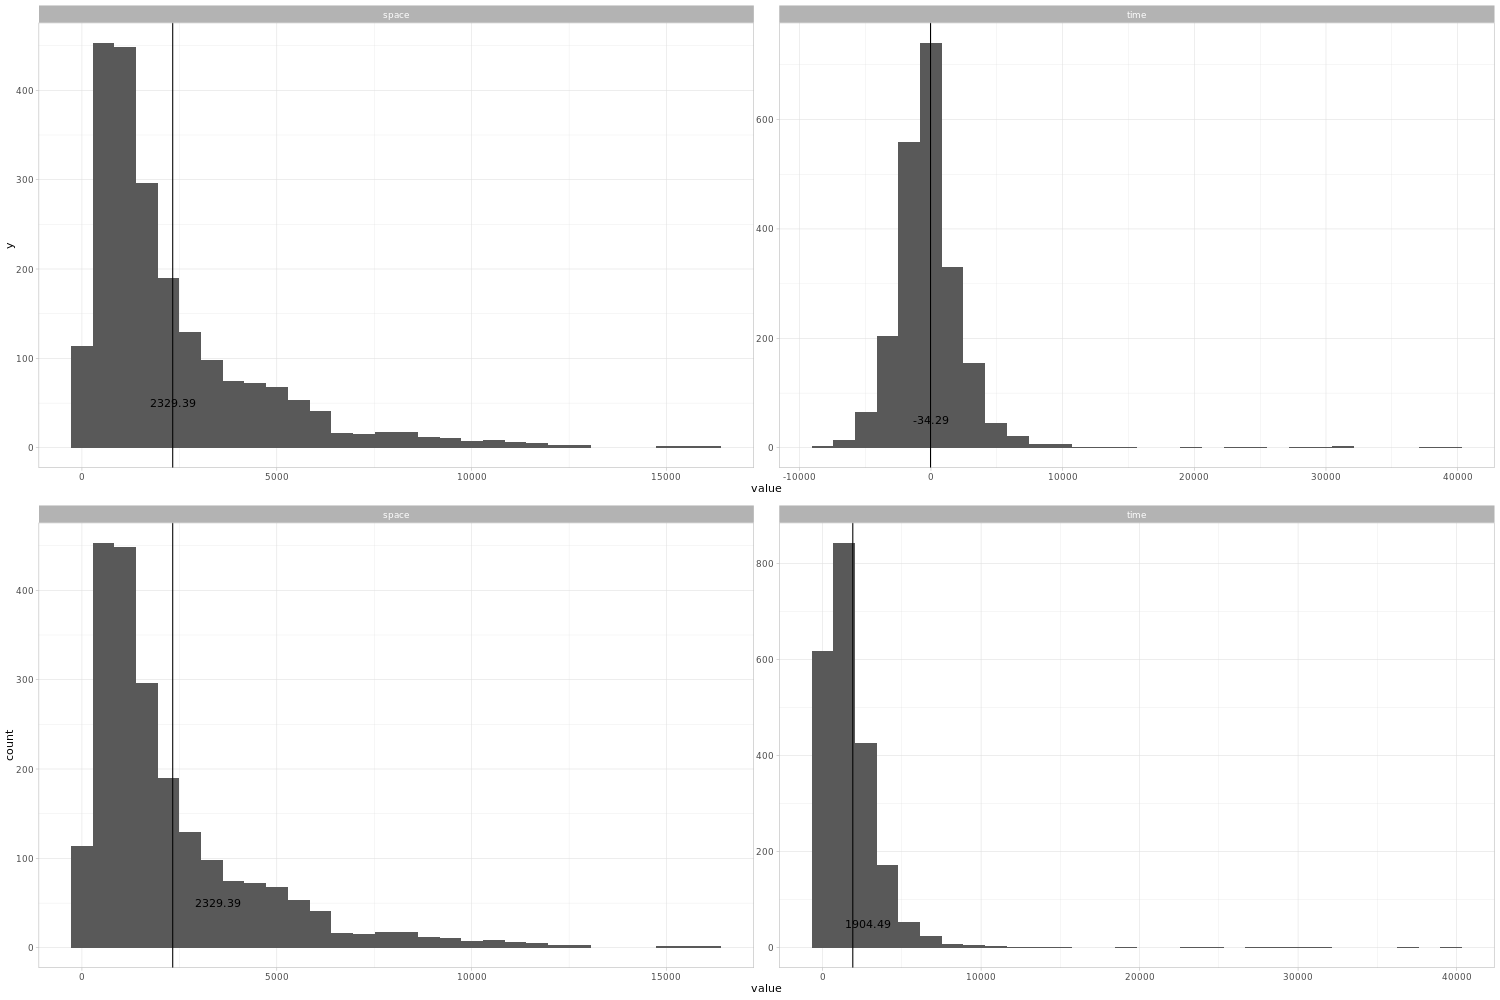

In [49]:
%%R -w 1500 -h 1000

exp = "2"
cro = "1"
sta = "10000000"
end = "20000000"
pre = "sNNt"

plot_grid(
    get_diff_data(exp, pre, cro, sta, end) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean, y = 50, label = round(mean, 2))) +
        #geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +    
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    get_diff_data(exp, pre, cro, sta, end) %>%
        mutate(value = sqrt(value^2)) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        #geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean+(mean*0.5), y = 50, label = round(mean, 2))) +
        ylab("count") +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    nrow = 2) -> plot

plot

#ggsave("diff.pdf", width = 20*1.5, height = 15*1.5, units = "cm")

#plot

In [50]:
%%R


error_spaceNNtime_all_scenarios <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
        #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        #sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        sta = as.numeric(sta)*1e6
        end = experiments %>% pull(end) %>% .[i]
        end = as.numeric(end)*1e6
        win = experiments %>% pull(win) %>% .[i]
        win = as.numeric(win)*1e6
        pre = experiments %>% pull(pre) %>% .[i]
        
        c = format(sta, scientific = FALSE, trim = TRUE)
        e = format(end, scientific = FALSE, trim = TRUE)
        w = format(win, scientific = FALSE, trim = TRUE)
        
        
        
        if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", c, "_", e, "_", w, ".txt", sep = ""))){
            all_scenarios = rbind(all_scenarios, 
                                  get_diff_data(exp, pre, cro, c, e, w) %>%
                                              mutate(value = abs(value)) %>%
                                              group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
                                              summarize(mean = mean(value),
                                                        se   = sd(value)/sqrt(n()),
                                                        n    = n()) %>%
                                              mutate(exp = factor(exp))
                                         )
        }else{
            if(end < win){
                end = win
            }
            for(s in seq(sta, end-win, win)){             
                z = format(s, scientific = FALSE, trim = TRUE)
                y = format(s+win, scientific = FALSE, trim = TRUE)
                if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""))){
                    all_scenarios = rbind(all_scenarios, 
                                          get_diff_data(exp, pre, cro, z, y) %>%
                                              mutate(value = abs(value)) %>%
                                              group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
                                              summarize(mean = mean(value),
                                                        se   = sd(value)/sqrt(n()),
                                                        n    = n()) %>%
                                              mutate(exp = factor(exp))
                                         )
                }else{
                    print(paste("the file ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""), " nor ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", e, "_", w, ".txt", sep = ""), " does not exist!", sep = ""))
                }
            }

        }
    }
    all_scenarios
}

all_scenarios <- error_spaceNNtime_all_scenarios()
head(all_scenarios)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] "the file ../../sandbox/AADR/10/pred_1_130000000_140000000.txt nor ../../sandbox/AADR/10/pred_1_130000000_250000000_10000000.txt does not exist!"
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
# A tibble: 6 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
  exp     cro      sta      end extendedexp  nam   typ   stat   mean    se     n
  <fct> <int>    <int>    <int> <chr>        <chr> <chr> <chr> <dbl> <dbl> <int>
1 1         1 10000000 20000000 1_1_1000000… loss  gt    space 2514.  34.9  4847
2 1         1 10000000 20000000 1_1_1000000… loss  gt    time  1886.  38.4  4847
3 2         1        0 10000000 2_1_0_10000… gene… gt    space 2256.  33.6  4847
4 2         1        0 10000000 2_1_0_10000… gene… gt    time  1916.  39.4  4847
5 2         1 10000000 20000000 2_1_1000000… gene… gt    space 2293.  33.5  4847
6 2         1 10000000 20000000 2_1_1000000… gene… gt    time  1905.  39.6  4847


In [51]:
%%R

get_all_data <- function(exp, pre, cro, sta, end, win=0){
    if(win == 0){
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = "")
    }else{
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, "_", win, ".txt", sep = "")
    }
    
    read.table(file, header = T) %>%
        #mutate(cro = cro, sta = sta, end = end) %>%
        mutate(extendedexp = paste(exp, cro, sta, end, sep = "_")) %>%
        left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
             select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>%
        filter(datmet != "Modern") -> a
    if(pre == "space"){
        a %>%
            mutate(true_tim = 0, pred_tim = 0, diff_time = 0) -> a
    }
    if(pre == "time"){
        a %>%
            mutate(true_lat = 0, true_lon = 0, pred_lat = 0, pred_lon = 0, diff_space = 0) -> a
    }  

    a
}

error_spaceNNtime_mean_windows <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") -> experiments

    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
        #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        #sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        sta = as.numeric(sta)*1e6
        end = experiments %>% pull(end) %>% .[i]
        end = as.numeric(end)*1e6
        win = experiments %>% pull(win) %>% .[i]
        win = as.numeric(win)*1e6
        pre = experiments %>% pull(pre) %>% .[i]
        
        c = format(sta, scientific = FALSE, trim = TRUE)
        e = format(end, scientific = FALSE, trim = TRUE)
        w = format(win, scientific = FALSE, trim = TRUE)
        
        
        
        if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", c, "_", e, "_", w, ".txt", sep = ""))){
            all_scenarios = rbind(all_scenarios, 
                                  get_all_data(exp, pre, cro, c, e, w) 
                                         )
        }else{
            if(end < win){
                end = win
            }
            for(s in seq(sta, end-win, win)){             
                z = format(s, scientific = FALSE, trim = TRUE)
                y = format(s+win, scientific = FALSE, trim = TRUE)
                if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""))){
                    all_scenarios = rbind(all_scenarios, 
                                          get_all_data(exp, pre, cro, z, y) 
                                         )
                }else{
                    print(paste("the file ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""), " nor ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", e, "_", w, ".txt", sep = ""), " does not exist!", sep = ""))
                }
            }

        }
    }
    
    all_scenarios %>%
        group_by(sim, exp, ind, cro) %>%
        summarize(sta = min(sta),
                  end = max(end),
                  true_lat = mean(true_lat),
                  true_lon = mean(true_lon),
                  pred_lat = mean(pred_lat),
                  pred_lon = mean(pred_lon),
                  true_tim = mean(true_tim),
                  pred_tim = mean(pred_tim))
        
        
}

error_spaceNNtime_median_windows <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") -> experiments

    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
        #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        #sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        sta = as.numeric(sta)*1e6
        end = experiments %>% pull(end) %>% .[i]
        end = as.numeric(end)*1e6
        win = experiments %>% pull(win) %>% .[i]
        win = as.numeric(win)*1e6
        pre = experiments %>% pull(pre) %>% .[i]
        
        c = format(sta, scientific = FALSE, trim = TRUE)
        e = format(end, scientific = FALSE, trim = TRUE)
        w = format(win, scientific = FALSE, trim = TRUE)
        
        
        
        if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", c, "_", e, "_", w, ".txt", sep = ""))){
            all_scenarios = rbind(all_scenarios, 
                                  get_all_data(exp, pre, cro, c, e, w) 
                                         )
        }else{
            if(end < win){
                end = win
            }
            for(s in seq(sta, end-win, win)){             
                z = format(s, scientific = FALSE, trim = TRUE)
                y = format(s+win, scientific = FALSE, trim = TRUE)
                if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""))){
                    all_scenarios = rbind(all_scenarios, 
                                          get_all_data(exp, pre, cro, z, y) 
                                         )
                }else{
                    print(paste("the file ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""), " nor ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", e, "_", w, ".txt", sep = ""), " does not exist!", sep = ""))
                }
            }

        }
    }
    
    all_scenarios %>%
        group_by(sim, exp, ind, cro) %>%
        summarize(sta = min(sta),
                  end = max(end),
                  true_lat = median(true_lat),
                  true_lon = median(true_lon),
                  pred_lat = median(pred_lat),
                  pred_lon = median(pred_lon),
                  true_tim = median(true_tim),
                  pred_tim = median(pred_tim))
        
        
}

error_spaceNNtime_mean_windows() %>%
    mutate(space = haversine(true_lat, true_lon, pred_lat, pred_lon),
           time  = sqrt((pred_tim-true_tim)^2),
           extendedexp = paste(exp, cro, sta, end, sep = "_"),
           nam = "mean",
           typ = "gt") %>%
    as.data.frame() %>%
    select(-c(sim, true_lat, true_lon, pred_lat, pred_lon, true_tim, pred_tim)) %>%
    gather("stat", "diff", space, time) %>%
    group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
    summarize(mean = mean(diff), se = sd(diff)/sqrt(n()), n = n()) %>%
    filter(sta == 0) -> mean_scenarios

error_spaceNNtime_median_windows() %>%
    mutate(space = haversine(true_lat, true_lon, pred_lat, pred_lon),
           time  = sqrt((pred_tim-true_tim)^2),
           extendedexp = paste(exp, cro, sta, end, sep = "_"),
           nam = "mean",
           typ = "gt") %>%
    as.data.frame() %>%
    select(-c(sim, true_lat, true_lon, pred_lat, pred_lon, true_tim, pred_tim)) %>%
    gather("stat", "diff", space, time) %>%
    group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
    summarize(mean = mean(diff), se = sd(diff)/sqrt(n()), n = n()) %>%
    filter(sta == 0) -> median_scenarios

head(median_scenarios)


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] "the file ../../sandbox/AADR/10/pred_1_130000000_140000000.txt nor ../../sandbox/AADR/10/pred_1_130000000_250000000_10000000.txt does not exist!"
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] "the file ../../sandbox/AADR/10/pred_1_130000000_140000000.txt nor ../../sandbox/AADR/10/pred_1_130000000_250000000_10000000.txt does not exist!"
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
# A tibble: 6 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
    exp   cro   sta       end extendedexp    nam   typ   stat   mean    se     n
  <int> <int> <int>     <int> <chr>          <chr> <chr> <chr> <dbl> <dbl> <int>
1     2     1     0 100000000 2_1_0_1000000… mean  gt    space 1841.  30.6  4847
2     2     1     0 100000000 2_1_0_1000000… mean  gt    time  1719.  38.5  4847
3     2     2     0 100000000 2_2_0_1000000… mean  gt    space 18

In [52]:
%%R

all_scenarios %>%
    head()

# A tibble: 6 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
  exp     cro      sta      end extendedexp  nam   typ   stat   mean    se     n
  <fct> <int>    <int>    <int> <chr>        <chr> <chr> <chr> <dbl> <dbl> <int>
1 1         1 10000000 20000000 1_1_1000000… loss  gt    space 2514.  34.9  4847
2 1         1 10000000 20000000 1_1_1000000… loss  gt    time  1886.  38.4  4847
3 2         1        0 10000000 2_1_0_10000… gene… gt    space 2256.  33.6  4847
4 2         1        0 10000000 2_1_0_10000… gene… gt    time  1916.  39.4  4847
5 2         1 10000000 20000000 2_1_1000000… gene… gt    space 2293.  33.5  4847
6 2         1 10000000 20000000 2_1_1000000… gene… gt    time  1905.  39.6  4847


In [53]:
%%R

mean_scenarios %>%
    head()

# A tibble: 6 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
    exp   cro   sta       end extendedexp    nam   typ   stat   mean    se     n
  <int> <int> <int>     <int> <chr>          <chr> <chr> <chr> <dbl> <dbl> <int>
1     2     1     0 100000000 2_1_0_1000000… mean  gt    space 2032.  31.9  4847
2     2     1     0 100000000 2_1_0_1000000… mean  gt    time  1721.  37.3  4847
3     2     2     0 100000000 2_2_0_1000000… mean  gt    space 2093.  34.4  4274
4     2     2     0 100000000 2_2_0_1000000… mean  gt    time  1724.  39.0  4274
5     4     1     0 100000000 4_1_0_1000000… mean  gt    space 1526.  42.4  1797
6     4     1     0 100000000 4_1_0_1000000… mean  gt    time  1541.  48.6  1797


In [54]:
%%R

rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()) %>% head()

# A tibble: 6 × 11
  exp     cro      sta      end extendedexp  nam   typ   stat   mean    se     n
  <fct> <int>    <int>    <int> <chr>        <chr> <chr> <chr> <dbl> <dbl> <int>
1 1         1 10000000 20000000 1_1_1000000… loss  gt    space 2514.  34.9  4847
2 1         1 10000000 20000000 1_1_1000000… loss  gt    time  1886.  38.4  4847
3 2         1        0 10000000 2_1_0_10000… gene… gt    space 2256.  33.6  4847
4 2         1        0 10000000 2_1_0_10000… gene… gt    time  1916.  39.4  4847
5 2         1 10000000 20000000 2_1_1000000… gene… gt    space 2293.  33.5  4847
6 2         1 10000000 20000000 2_1_1000000… gene… gt    time  1905.  39.6  4847


In [55]:
%%R

plot_errors <- function(all_scenarios_all, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE){
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "space") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels = labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot1
    
    if(ylimspace[1] != "None"){
        plot1 + coord_cartesian(ylim = ylimspace) -> plot1
    }
    if(nolegend){
        plot1 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot1
    }
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "time") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot2
    
    if(ylimtime[1] != "None"){
        plot2 + coord_cartesian(ylim = ylimtime) -> plot2
    }
    if(nolegend){
        plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
    }
    
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot1, plot2, ncol = 1, rel_heights=c(0.1, 1, 1))

}

In [56]:
%%R

all_scenarios %>%
    as.data.frame() %>%
    head()

  exp cro      sta      end           extendedexp     nam typ  stat     mean
1   1   1 10000000 20000000 1_1_10000000_20000000    loss  gt space 2514.084
2   1   1 10000000 20000000 1_1_10000000_20000000    loss  gt  time 1886.007
3   2   1        0 10000000        2_1_0_10000000 general  gt space 2255.937
4   2   1        0 10000000        2_1_0_10000000 general  gt  time 1915.864
5   2   1 10000000 20000000 2_1_10000000_20000000 general  gt space 2293.491
6   2   1 10000000 20000000 2_1_10000000_20000000 general  gt  time 1904.903
        se    n
1 34.85147 4847
2 38.36633 4847
3 33.64686 4847
4 39.35188 4847
5 33.54905 4847
6 39.55670 4847


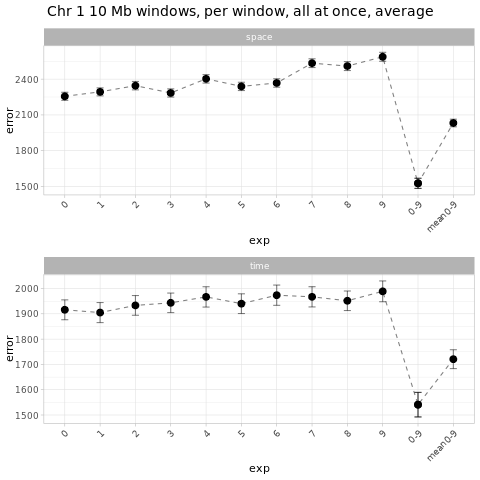

In [24]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_0_10000000",       "2_1_10000000_20000000",       "2_1_20000000_30000000",       "2_1_30000000_40000000",       "2_1_40000000_50000000",       "2_1_50000000_60000000",       "2_1_60000000_70000000",       "2_1_70000000_80000000",       "2_1_80000000_90000000",       "2_1_90000000_100000000",       "4_1_0_100000000",         "2_1_0_100000000"), 
            labels            = c("2_1_0_10000000" = "0", "2_1_10000000_20000000" = "1", "2_1_20000000_30000000" = "2", "2_1_30000000_40000000" = "3", "2_1_40000000_50000000" = "4", "2_1_50000000_60000000" = "5", "2_1_60000000_70000000" = "6", "2_1_70000000_80000000" = "7", "2_1_80000000_90000000" = "8", "2_1_90000000_100000000" = "9", "4_1_0_100000000" = "0-9", "2_1_0_100000000" = "mean0-9"), 
            limits            = c("2_1_0_10000000",       "2_1_10000000_20000000",       "2_1_20000000_30000000",       "2_1_30000000_40000000",       "2_1_40000000_50000000",       "2_1_50000000_60000000",       "2_1_60000000_70000000",       "2_1_70000000_80000000",       "2_1_80000000_90000000",       "2_1_90000000_100000000",       "4_1_0_100000000",         "2_1_0_100000000"),  
            title             = "Chr 1 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")


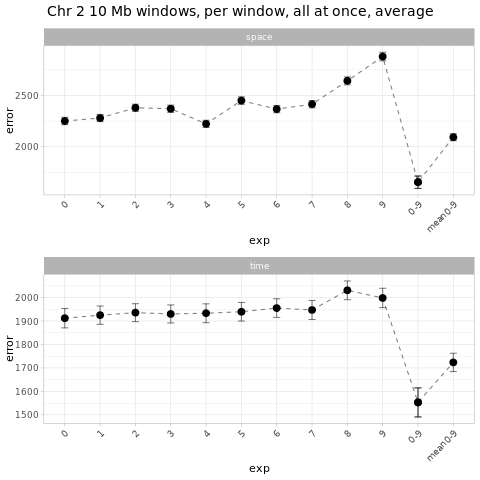

In [25]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_2_0_10000000",       "2_2_10000000_20000000",       "2_2_20000000_30000000",       "2_2_30000000_40000000",       "2_2_40000000_50000000",       "2_2_50000000_60000000",       "2_2_60000000_70000000",       "2_2_70000000_80000000",       "2_2_80000000_90000000",       "2_2_90000000_100000000",       "4_2_0_100000000",         "2_2_0_100000000"), 
            labels            = c("2_2_0_10000000" = "0", "2_2_10000000_20000000" = "1", "2_2_20000000_30000000" = "2", "2_2_30000000_40000000" = "3", "2_2_40000000_50000000" = "4", "2_2_50000000_60000000" = "5", "2_2_60000000_70000000" = "6", "2_2_70000000_80000000" = "7", "2_2_80000000_90000000" = "8", "2_2_90000000_100000000" = "9", "4_2_0_100000000" = "0-9", "2_2_0_100000000" = "mean0-9"), 
            limits            = c("2_2_0_10000000",       "2_2_10000000_20000000",       "2_2_20000000_30000000",       "2_2_30000000_40000000",       "2_2_40000000_50000000",       "2_2_50000000_60000000",       "2_2_60000000_70000000",       "2_2_70000000_80000000",       "2_2_80000000_90000000",       "2_2_90000000_100000000",       "4_2_0_100000000",         "2_2_0_100000000"),  
            title             = "Chr 2 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

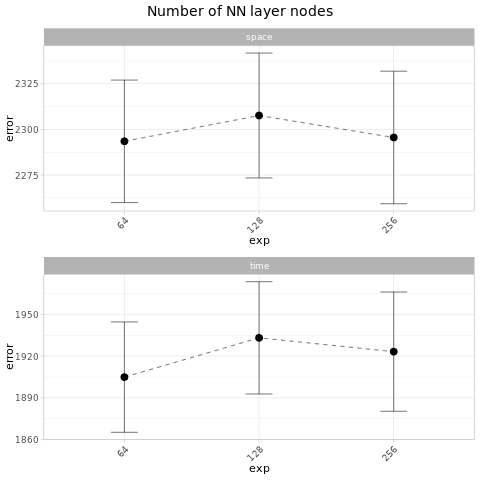

In [26]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_10000000_20000000"       , "7_1_10000000_20000000"        , "8_1_10000000_20000000"        ), 
            labels            = c("2_1_10000000_20000000" = "64", "7_1_10000000_20000000" = "128", "8_1_10000000_20000000" = "256"), 
            limits            = c("2_1_10000000_20000000"       , "7_1_10000000_20000000"        , "8_1_10000000_20000000"        ),  
            title             = "Number of NN layer nodes", 
            xlab              = "exp", 
            ylab              = "error")

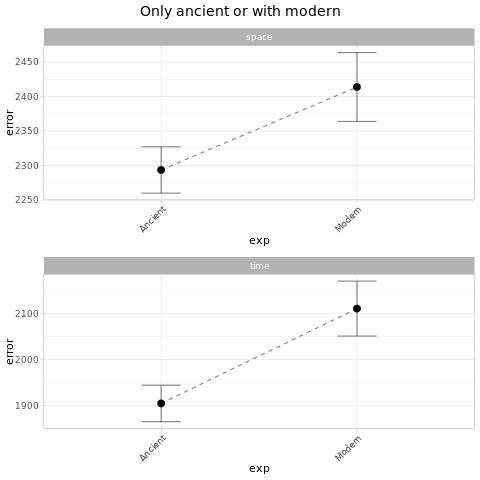

In [27]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_10000000_20000000"            , "9_1_10000000_20000000"           ), 
            labels            = c("2_1_10000000_20000000" = "Ancient", "9_1_10000000_20000000" = "Modern"), 
            limits            = c("2_1_10000000_20000000"            , "9_1_10000000_20000000"           ),  
            title             = "Only ancient or with modern", 
            xlab              = "exp", 
            ylab              = "error")

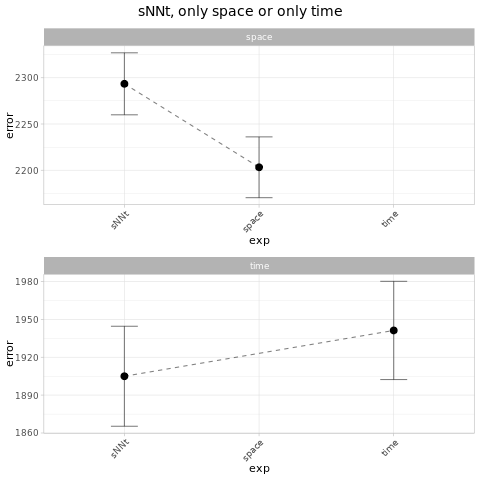

In [28]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_10000000_20000000"         , "5_1_10000000_20000000"          , "6_1_10000000_20000000"           ), 
            labels            = c("2_1_10000000_20000000" = "sNNt", "5_1_10000000_20000000" = "space", "6_1_10000000_20000000" = "time"), 
            limits            = c("2_1_10000000_20000000"         , "5_1_10000000_20000000"          , "6_1_10000000_20000000"           ),  
            title             = "sNNt, only space or only time", 
            xlab              = "exp", 
            ylab              = "error")

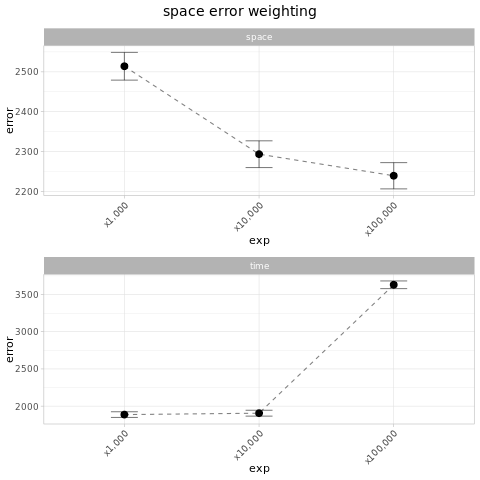

In [29]:
%%R

plot_errors(all_scenarios_all = all_scenarios, 
            exp_to_plot       = c("1_1_10000000_20000000",       "2_1_10000000_20000000",       "3_1_10000000_20000000"), 
            labels            = c("1_1_10000000_20000000" = "x1,000", "2_1_10000000_20000000" = "x10,000", "3_1_10000000_20000000" = "x100,000"), 
            limits            = c("1_1_10000000_20000000",       "2_1_10000000_20000000",       "3_1_10000000_20000000"),  
            title             = "space error weighting", 
            xlab              = "exp", 
            ylab              = "error")

In [30]:
%%R

plot_errors_tims <- function(all_scenarios_all, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE){
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "time") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot2
    
    if(ylimtime[1] != "None"){
        plot2 + coord_cartesian(ylim = ylimtime) -> plot2
    }
    if(nolegend){
        plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
    }
    
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot2, ncol = 1, rel_heights=c(0.1, 1))

}

In [31]:
%%R

all_scenarios %>% filter(exp == 12)

# A tibble: 1 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [1]
  exp     cro      sta      end extendedexp  nam   typ   stat   mean    se     n
  <fct> <int>    <int>    <int> <chr>        <chr> <chr> <chr> <dbl> <dbl> <int>
1 12        1 10000000 20000000 12_1_100000… tims… gt    time  1208.  23.1  2134


In [32]:
%%R

mean_scenarios %>% filter(exp == 14) 

# A tibble: 2 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [1]
    exp   cro   sta        end extendedexp   nam   typ   stat   mean    se     n
  <int> <int> <int>      <int> <chr>         <chr> <chr> <chr> <dbl> <dbl> <int>
1    14     1     0 1000000000 14_1_0_10000… mean  gt    space    0    0    1269
2    14     1     0 1000000000 14_1_0_10000… mean  gt    time  1061.  28.2  1269


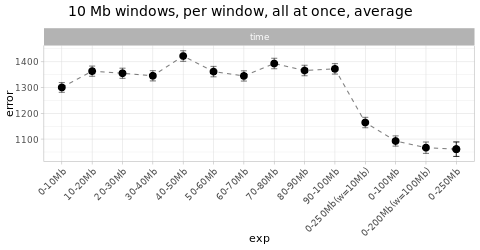

In [33]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ), 
            labels            = c("10_1_0_10000000" = "0-10Mb", "10_1_10000000_20000000" = "10-20Mb", "10_1_20000000_30000000" = "20-30Mb", "10_1_30000000_40000000" = "30-40Mb", "10_1_40000000_50000000" = "40-50Mb", "10_1_50000000_60000000" = "50-60Mb", "10_1_60000000_70000000" = "60-70Mb", "10_1_70000000_80000000" = "70-80Mb", "10_1_80000000_90000000" = "80-90Mb", "10_1_90000000_100000000" = "90-100Mb", "10_1_0_250000000" = "0-250Mb(w=10Mb)", "11_1_0_100000000" = "0-100Mb", "11_1_0_200000000" = "0-200Mb(w=100Mb)", "14_1_0_1000000000" = "0-250Mb"), 
            limits            = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ),  
            title             = "10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

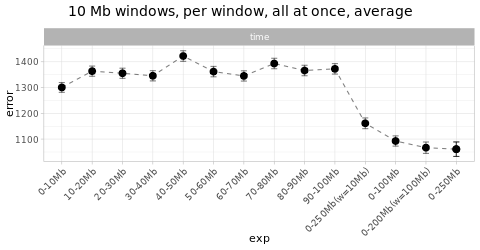

In [34]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), median_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ), 
            labels            = c("10_1_0_10000000" = "0-10Mb", "10_1_10000000_20000000" = "10-20Mb", "10_1_20000000_30000000" = "20-30Mb", "10_1_30000000_40000000" = "30-40Mb", "10_1_40000000_50000000" = "40-50Mb", "10_1_50000000_60000000" = "50-60Mb", "10_1_60000000_70000000" = "60-70Mb", "10_1_70000000_80000000" = "70-80Mb", "10_1_80000000_90000000" = "80-90Mb", "10_1_90000000_100000000" = "90-100Mb", "10_1_0_250000000" = "0-250Mb(w=10Mb)", "11_1_0_100000000" = "0-100Mb", "11_1_0_200000000" = "0-200Mb(w=100Mb)", "14_1_0_1000000000" = "0-250Mb"), 
            limits            = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ),  
            title             = "10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

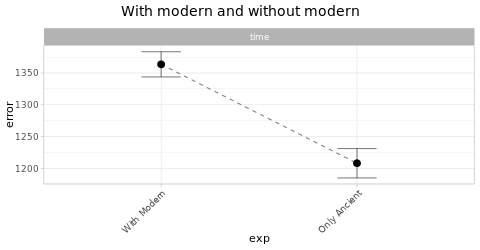

In [35]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_10000000_20000000",                 "12_1_10000000_20000000"                 ),  
            labels            = c("10_1_10000000_20000000" = "With Modern", "12_1_10000000_20000000" = "Only Ancient"), 
            limits            = c("10_1_10000000_20000000",                 "12_1_10000000_20000000"                 ),  
            title             = "With modern and without modern", 
            xlab              = "exp", 
            ylab              = "error")

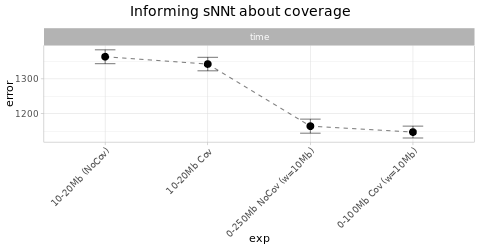

In [36]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_10000000_20000000",                     "13_1_10000000_20000000"                , "10_1_0_250000000",                          "13_1_0_100000000"),  
            labels            = c("10_1_10000000_20000000" = "10-20Mb (NoCov)", "13_1_10000000_20000000" = "10-20Mb Cov", "10_1_0_250000000" = "0-250Mb NoCov (w=10Mb)", "13_1_0_100000000" = "0-100Mb Cov (w=10Mb)"), 
            limits            = c("10_1_10000000_20000000",                     "13_1_10000000_20000000"                , "10_1_0_250000000",                          "13_1_0_100000000"),  
            title             = "Informing sNNt about coverage", 
            xlab              = "exp", 
            ylab              = "error")

In [18]:
%%bash

wc -l ../../files/AADR_filtered_metadata.txt

16467 ../../files/AADR_filtered_metadata.txt


In [22]:
%%R

read.table("../../sandbox/AADR/14/pred_1_0_1000000000.txt", header = T) %>% head()

   sim exp  nam typ cro sta        end gro          ind  idx   snp      run
1 AADR  14 tims  gt   1   0 1000000000   0       OBR004  566 93166 5.516302
2 AADR  14 tims  gt   1   0 1000000000   0       SCH009 1529 93166 5.516302
3 AADR  14 tims  gt   1   0 1000000000   0 NE5_noUDG.SG 1934 93166 5.516302
4 AADR  14 tims  gt   1   0 1000000000   1   NA18530.SG  250 93166 7.481417
5 AADR  14 tims  gt   1   0 1000000000   1        I6937 2136 93166 7.481417
6 AADR  14 tims  gt   1   0 1000000000   1   HG03857.SG 4216 93166 7.481417
  true_tim   pred_tim   diff_time
1     4512 4058.85860   453.14136
2     7050 5833.93000  1216.06982
3     7058 4096.92300  2961.07715
4        0  -36.61932    36.61932
5      188 3509.29150 -3321.29150
6        0   11.24456   -11.24456


In [62]:
%%R


read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% head()

   sim exp       nam typ cro sta       end gro                ind  idx   snp
1 AADR   4 allwindow  gt   1   0 100000000   0             I13840   26 40846
2 AADR   4 allwindow  gt   1   0 100000000   0             I15969  827 40846
3 AADR   4 allwindow  gt   1   0 100000000   0      DA13_noUDG.SG 2131 40846
4 AADR   4 allwindow  gt   1   0 100000000   1 s19_X20_1_noUDG.SG 1189 40846
5 AADR   4 allwindow  gt   1   0 100000000   1     CR-01_noUDG.SG 4163 40846
6 AADR   4 allwindow  gt   1   0 100000000   1          R11833.SG 4740 40846
       run true_lat   true_lon pred_lat  pred_lon diff_space true_tim pred_tim
1 12.42778 40.67111   20.98472 42.00846  14.37418  571.40063     6102 5003.010
2 12.42778 18.45100  -69.68600 18.15435 -69.70998   33.08282      995  888.078
3 12.42778 49.06065   75.50320 48.46994  81.07380  413.44055     2568 2130.256
4 16.41617 59.43080   24.90890 52.92200  28.32079  753.67510     2787 2218.277
5 16.41617 34.00361 -119.72639 20.93751 -88.02425 3429.48780     1

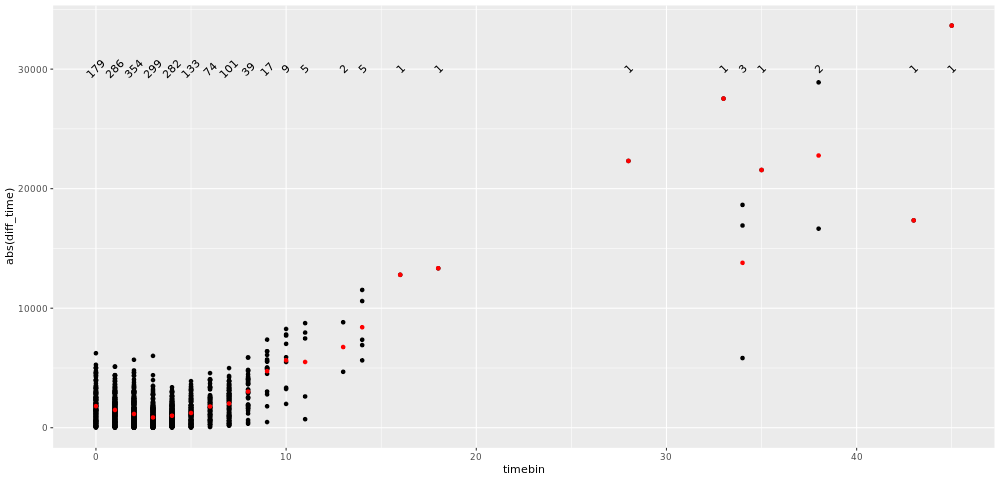

In [108]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    mutate(timebin = trunc(true_tim/1000)) %>%
    ggplot() +
    geom_point(aes(x = timebin, y = abs(diff_time))) +
    geom_point(data = . %>% group_by(timebin) %>% summarize(mean_diff_time = mean(abs(diff_time))), aes(x = timebin, y = mean_diff_time), color = "red") +
    geom_text(data = . %>% group_by(timebin) %>% summarize(n = n()), aes(x = timebin, y = 30000, label = n), angle = 45)

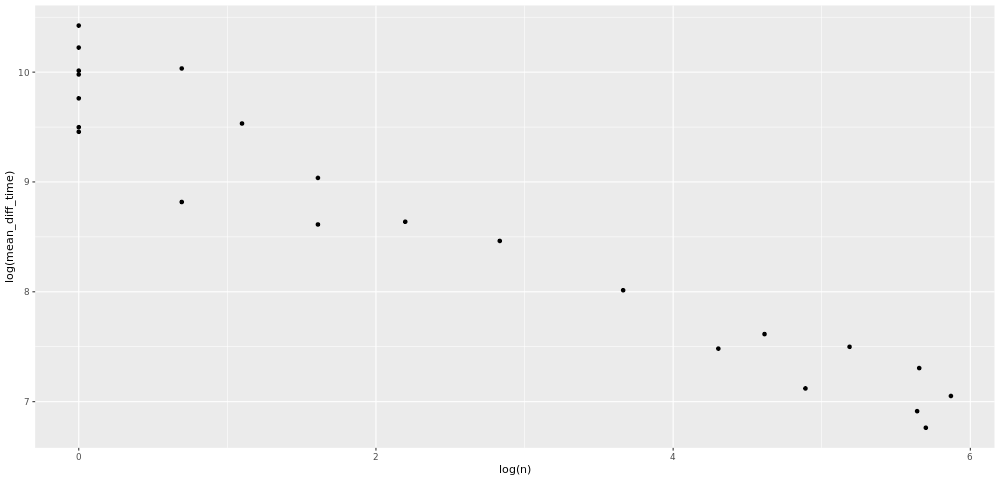

In [112]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    mutate(timebin = trunc(true_tim/1000)) %>%
    group_by(timebin) %>% 
    summarize(n = n(), mean_diff_time = mean(abs(diff_time))) %>%
    ggplot() +
    geom_point(aes(x = log(n), y = log(mean_diff_time)) )

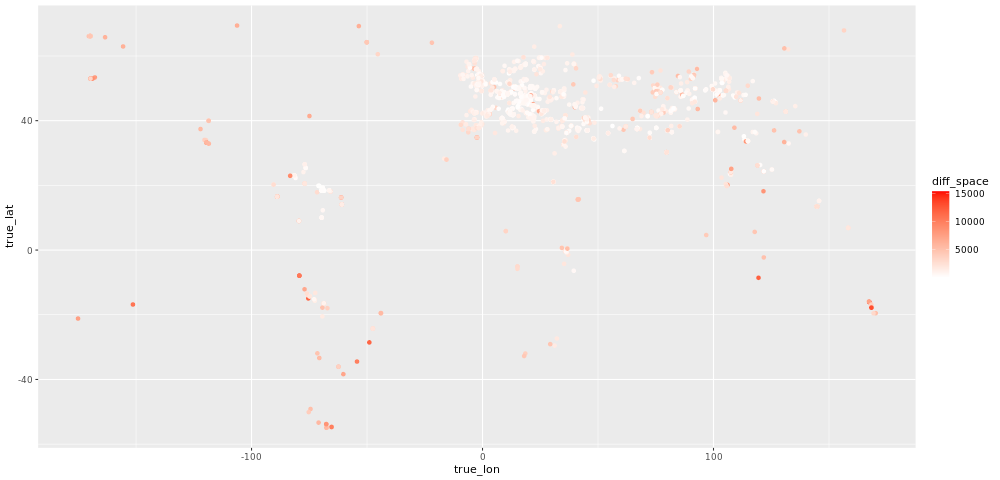

In [85]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    filter(true_tim > 0, ) %>%
    ggplot() +
    geom_point(aes(x = true_lon, y = true_lat, color = diff_space)) +
    scale_color_gradient2(low = "blue", 
                         mid = "white", 
                         high = "red", 
                         midpoint = 0)

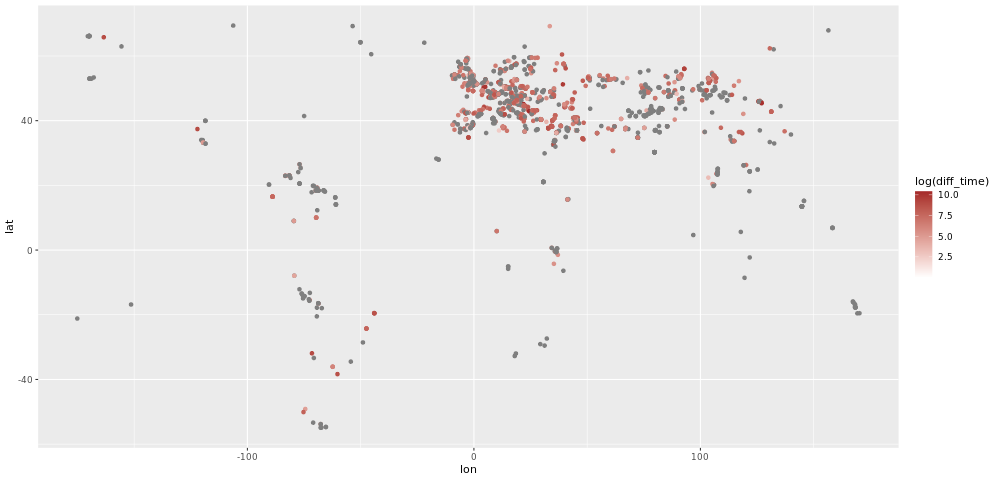

In [63]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>% select(ind = indivi, lat = latitu, lon = longit), by = c("ind")) %>%
    mutate(lon = as.numeric(as.character(lon)),
           lat = as.numeric(as.character(lat))) %>%
    ggplot() +
    geom_jitter(aes(x = lon, y = lat, color = log(diff_time))) +
    scale_color_gradient2(low = "blue", 
                         mid = "white", 
                         high = "brown", 
                         midpoint = 0)

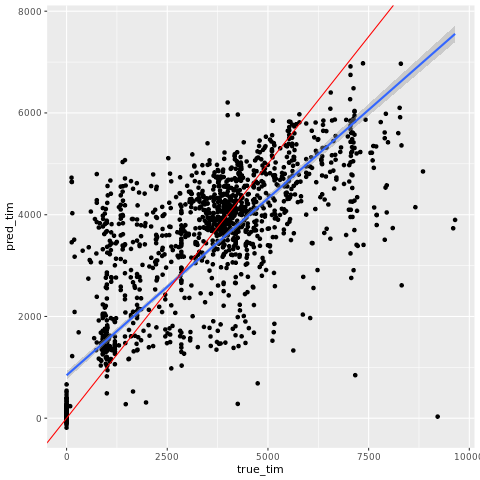

In [4]:
%%R

read.table("../../sandbox/AADR/14/pred_1_0_1000000000.txt", header = T) %>%
    ggplot() +
    geom_point(aes(x = true_tim, y = pred_tim)) +
    geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true_tim, y = pred_tim))+
    geom_abline(intercept = 0, slope = 1, color = "red")

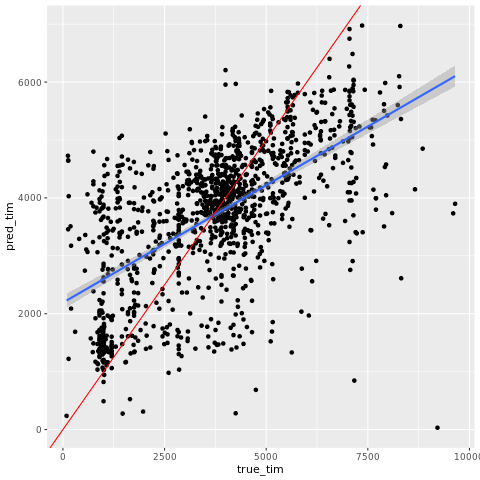

In [38]:
%%R

read.table("../../sandbox/AADR/14/pred_1_0_1000000000.txt", header = T) %>%
    filter(true_tim > 0) %>%
    ggplot() +
    geom_point(aes(x = true_tim, y = pred_tim)) +
    geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true_tim, y = pred_tim))+
    geom_abline(intercept = 0, slope = 1, color = "red")